In [63]:
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly import data

from scipy.stats import chi2_contingency, f_oneway
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
sport = pd.read_spss('eurobarometer 97.3.sav')

In [4]:
gender = sport.d10
occupation = sport.d15a
work_status = sport.d15b
maritial_status = sport.d7
country = sport.country
age = sport.d11
age_g = sport.d11r2
sport_activity = sport.qb1
#How often do you exercise or play sport?

physical_activity_c = sport.qb2
#How often do you engage in other physical activity?

vigourous_activity = sport.qb4
#How much time spend in vigorous physical activity?

moderate_activity = sport.qb6
#How much time spend in moderate physical activity?

walking_time = sport.qb8
walking_days = sport.qb7
#How much time spend in walking?

sitting = sport.qb9
#How much time spend sitting?

sport_facilities = sport[['qb10.1','qb10.2','qb10.3','qb10.4','qb10.5','qb10.6','qb10.7','qb10.8','qb10.9','qb10.10']]
#sport_facilities.replace('Not mentioned',0,inplace=True)

sport_activity_reason_c = sport[['qb11.1','qb11.2','qb11.3','qb11.4','qb11.5','qb11.6','qb11.7','qb11.8','qb11.9','qb11.10','qb11.11','qb11.12','qb11.13','qb11.14','qb11.15','qb11.16','qb11.17']]
#Why do you engage in sport or physical activity?
#sport_activity_reason.replace('Not mentioned',0,inplace=True)

oppurtunity = sport[['qb13_1','qb13_2','qb13_3']] 
#To what extent do you agree or disagree with the following statements about sport and physical activity?

sport_activity_preventing_reason_c = sport[['qb14.1','qb14.2','qb14.3','qb14.4','qb14.5','qb14.6','qb14.7','qb14.8','qb14.9','qb14.10','qb14.11','qb14.12','qb14.13']]

In [ ]:
#Age distribution
age_copy_m=age.copy()
age_copy_m.replace('15 years',15,inplace=True)
age_copy_m=age_copy_m.cat.remove_categories(['years','Refusal'])
age_copy_m=age_copy_m.cat.remove_unused_categories()
age_copy_m=age_copy_m.astype('float')

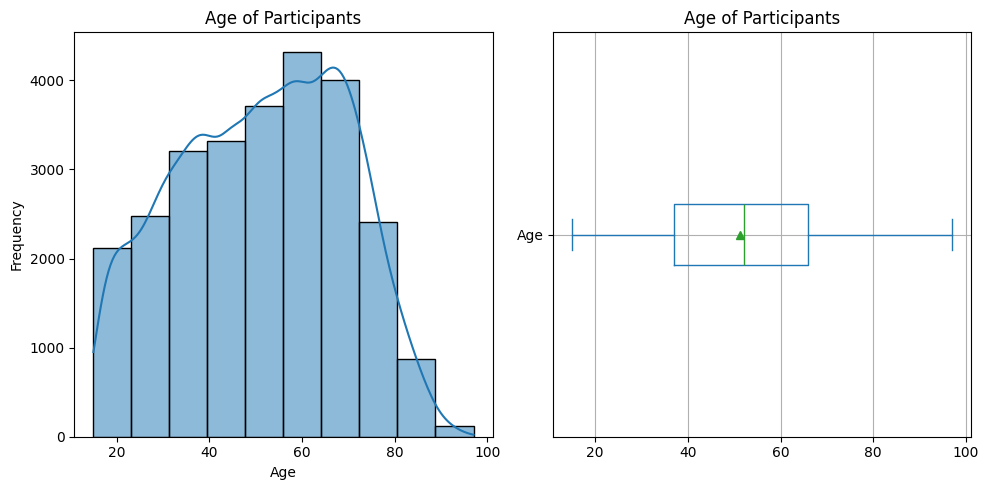

In [ ]:

plt.figure(figsize=(10, 5))  
plt.subplot(1, 2, 1)  

sns.histplot(age_copy_m, bins=10, kde=True, label='Age')
plt.title('Age of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)  
age_copy_m.plot(kind='box', title='Age of Participants', label='Age', showmeans=True, showfliers=False, showcaps=True, showbox=True, grid=True, vert=False)

plt.tight_layout()  
plt.show()

In [22]:
fig = px.pie(gender.value_counts(), names=['Woman','Man','None of these categories'], values=gender.value_counts(), title='Gender Distribution',hole=0.3,labels={'value':'Count'},color_discrete_sequence=['#ff7f0e', '#1f77b4'],width=1000,height=700)
fig.update_layout(yaxis_title="Percentage",title_text="Gender of Participants",title_x=0.5,title_font_size=30,legend={'font': {'size': 18}},font=dict(size=18))
fig.update_traces(
    textfont={'size': 20},  # Inside text font size
    hovertemplate='<b>%{label}</b>: %{value}<br>(%{percent})',  # Customize hover info
)
fig.show()

In [23]:

dataa={'Participate in sport':sport_activity.value_counts().sum()-sport_activity.value_counts().values[[0,2,6]].sum(),'Do not participate in sport':sport_activity.value_counts().values[[0,2,6]].sum()}


In [ ]:
#preparing data: considering the first 4 categories as 'Participate in sport' and the rest as 'Do not participate in sport'

sport_activity_c = sport_activity.copy()
sport_activity_c = sport_activity_c.astype('category')
mapping = map(lambda x: 'Participate in sport' if x in [sport_activity_c.cat.categories[0],sport_activity_c.cat.categories[1],sport_activity_c.cat.categories[2],sport_activity_c.cat.categories[3]] else 'Do not participate in sport',sport_activity_c)

sport_activity_c = pd.Series(list(mapping))


In [ ]:
gender_c=gender.copy()
gender_c= gender_c.cat.remove_categories(gender_c.cat.categories[1])

In [ ]:
age_g[age_g.values=='Refusal']=np.nan
age_g.dropna(inplace=True)
age_g=age_g.cat.remove_unused_categories()
gender_age_g= pd.concat([gender_c,age_g,sport_activity_c],axis=1)
gender_age_g.columns=['Gender','Age','SportActivity']

In [ ]:
#preparing data: considering the first 4 categories as 'Participate in physical activities' and the rest as 'Do not participate in physical activities'
physical_activity = physical_activity_c.copy()
physical_activity = physical_activity.astype('category')
mapping = map(lambda x: 'Participate in Physical Activity' if x in [physical_activity.cat.categories[0],physical_activity.cat.categories[1],physical_activity.cat.categories[2],physical_activity.cat.categories[3]] else 'Do not participate in Physical Activity',physical_activity)

physical_activity = pd.Series(list(mapping))

physical_activity = physical_activity.astype('category')

In [ ]:
physical_activity_counts = physical_activity.value_counts().sort_index()
sport_activity_c_counts = sport_activity_c.value_counts().sort_index()

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=('Sport Activities', 'Physical Activities'))

# Add the sport activity pie chart
fig.add_trace(go.Pie(labels=sport_activity_c_counts.index, values=sport_activity_c_counts.values, 
                     textinfo='percent', hoverinfo='label+value+percent',
                     marker=dict(colors=['#ff7f0e','#1f77b4','#ff9999','#66b3ff','#99ff99']), rotation=160), row=1, col=1)

# Add the physical activity pie chart
fig.add_trace(go.Pie(labels=physical_activity_counts.index, values=physical_activity_counts.values, 
                     textinfo='percent', hoverinfo='label+value+percent',
                     marker=dict(colors=['#ff7f0e','#1f77b4','#ff9999','#66b3ff','#99ff99'])), row=1, col=2)

fig.update_traces(hole=.3)
fig.update_layout(
    title_text='Activities Participation',
    title_x=0.5,
    title_font_size=24,
    annotations=[dict(font=dict(size=20))],
    font=dict(size=18),
)

fig.show()

In [ ]:
gender_age_g_ph= pd.concat([gender_c,age_g,sport_activity_c],axis=1)
gender_age_g_ph.columns=['Gender','Age','PhysicalActivity']
gender_age_g_ph.dropna(inplace=True)
cross_tab_percent = pd.crosstab(gender_age_g_ph['Gender'], gender_age_g_ph['PhysicalActivity'], normalize='index') * 100

# Display cross-tabulation with percentages based on the gender and physical activity and considering the first 4 categories as 'Participate in physical activities' and the rest as 'Do not participate in physical activities'
print(cross_tab_percent)

PhysicalActivity  Do not participate in sport  Participate in sport
Gender                                                             
Man                                 51.326572             48.673428
Woman                               59.188124             40.811876


In [30]:
gender_age_g_s= pd.concat([gender_c,age_g,sport_activity],axis=1)
gender_age_g_s.columns=['Gender','Age','PhysicalActivity']
gender_age_g_s.dropna(inplace=True)
cross_tab_percent = pd.crosstab(gender_age_g_s['Gender'], gender_age_g_s['PhysicalActivity'], normalize='index') * 100

# Display cross-tabulation with percentages
print(cross_tab_percent)

PhysicalActivity  1 to 2 times a week  1 to 3 times a month  \
Gender                                                        
Man                         19.837728              6.880325   
Woman                       18.263684              5.557901   

PhysicalActivity  3 to 4 times a week  5 times a week or more  DK (SPONT.)  \
Gender                                                                       
Man                         13.882353                8.073022     0.146045   
Woman                       10.813283                6.177009     0.063318   

PhysicalActivity  Less often      Never  
Gender                                   
Man                13.184584  37.995943  
Woman              13.606304  45.518503  


In [31]:
sport_activity_m = sport_activity.copy()
sport_activity_m = sport_activity_m.cat.remove_categories(['DK (SPONT.)'])

In [32]:
physical_activity_c_m = physical_activity_c.copy()
physical_activity_c_m = physical_activity_c_m.cat.remove_categories(['DK (SPONT.)'])

In [ ]:
sport_activity_counts = sport_activity_m.value_counts().sort_index()
physical_activity_counts = physical_activity_c_m.value_counts().sort_index()

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=('Sport Activities', 'Physical Activities'))

# Add the sport activity pie chart
fig.add_trace(go.Pie(labels=sport_activity_counts.index, values=sport_activity_counts.values, 
                     textinfo='percent+label', hoverinfo='label+value+percent'), row=1, col=1)

# Add the physical activity pie chart
fig.add_trace(go.Pie(labels=physical_activity_counts.index, values=physical_activity_counts.values, 
                     textinfo='percent+label', hoverinfo='label+value+percent'), row=1, col=2)

fig.update_traces(hole=.3)

fig.show()

In [ ]:
#preparing data for Chi-square test and Annova test
#The Chi-square test is used to determine if there is a significant association between Gender and having sport and physical acativities.

chi_df=pd.concat([age_copy_m,gender_c,sport_activity_c,physical_activity],axis=1)
chi_df.columns=['Age','Gender','SportActivity','PhysicalActivity']
chi_df.dropna(inplace=True)

contingency_table = pd.crosstab(chi_df['Gender'], [chi_df['SportActivity'], chi_df['PhysicalActivity']])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square statistic: 171.87009849626116
P-value: 5.022589888932967e-37
Degrees of freedom: 3
Expected frequencies table:
[[4086.50520009 2758.24007084  720.79282538 4759.46190369]
 [4712.49479991 3180.75992916  831.20717462 5488.53809631]]


In [ ]:
# Perform ANOVA test
#The ANOVA test is used to determine if there are significant differences in Age and having sport and physical activitis.

anova_result = f_oneway(
    chi_df[chi_df['SportActivity'] == 'Participate in sport']['Age'],
    chi_df[chi_df['SportActivity'] == 'Do not participate in sport']['Age'],
    chi_df[chi_df['PhysicalActivity'] == 'Participate in Physical Activity']['Age'],
    chi_df[chi_df['PhysicalActivity'] == 'Do not participate in Physical Activity']['Age']
)

print("ANOVA Result:")
print("F-statistic:", anova_result.statistic)
print("P-value:", anova_result.pvalue)

ANOVA Result:
F-statistic: 848.5676843226138
P-value: 0.0


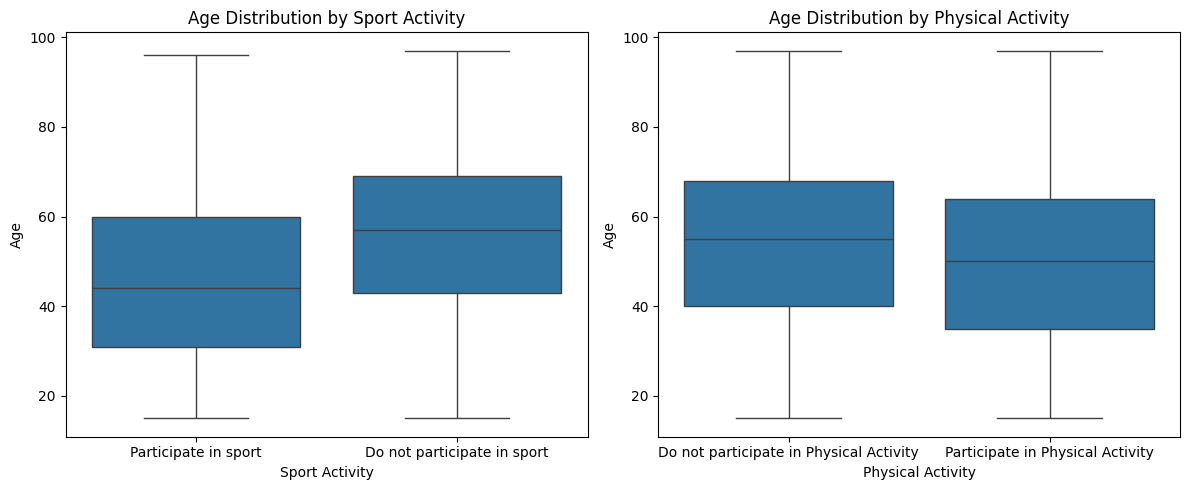

In [77]:
# Create box plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='SportActivity', y='Age', data=chi_df)
plt.title('Age Distribution by Sport Activity')
plt.xlabel('Sport Activity')
plt.ylabel('Age')

plt.subplot(1, 2, 2)

sns.boxplot(x='PhysicalActivity', y='Age', data=chi_df)
plt.title('Age Distribution by Physical Activity')
plt.xlabel('Physical Activity')
plt.ylabel('Age')
plt.tight_layout()  
plt.show()

In [ ]:
#preparing data
sport_facility=sport_facilities.copy()
sport_facility['qb10.1']=sport_facility['qb10.1'].cat.remove_categories('Not mentioned')
sport_facility['qb10.2']=sport_facility['qb10.2'].cat.remove_categories('Not mentioned')
sport_facility['qb10.3']=sport_facility['qb10.3'].cat.remove_categories('Not mentioned')
sport_facility['qb10.4']=sport_facility['qb10.4'].cat.remove_categories('Not mentioned')
sport_facility['qb10.5']=sport_facility['qb10.5'].cat.remove_categories('Not mentioned')
sport_facility['qb10.6']=sport_facility['qb10.6'].cat.remove_categories('Not mentioned')
sport_facility['qb10.7']=sport_facility['qb10.7'].cat.remove_categories('Not mentioned')    
sport_facility['qb10.8']=sport_facility['qb10.8'].cat.remove_categories('Not mentioned')
sport_facility['qb10.9']=sport_facility['qb10.9'].cat.remove_categories('Not mentioned')
sport_facility['qb10.10']=sport_facility['qb10.10'].cat.remove_categories('Not mentioned')


In [37]:
fig = px.pie(sport_facility.stack().value_counts(), names=sport_facility.stack().value_counts().index, values=sport_facility.stack().value_counts(), title='Sport Facilities',hole=0.3,labels={'value':'Count'},color_discrete_sequence=['#ff7f0e', '#1f77b4'],width=1000,height=700)
fig.update_layout(yaxis_title="Percentage",title_text="Sport Facilities",title_x=0.5,title_font_size=30,legend={'font': {'size': 18}},font=dict(size=18))
fig.update_traces(
    textfont={'size': 20},  # Inside text font size
    hovertemplate='<b>%{label}</b>: %{value}<br>(%{percent})',  # Customize hover info
)
fig.show()

In [ ]:
#preparing data
sport_activity_reason=sport_activity_reason_c.copy()
sport_activity_reason['qb11.1']=sport_activity_reason['qb11.1'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.2']=sport_activity_reason['qb11.2'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.3']=sport_activity_reason['qb11.3'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.4']=sport_activity_reason['qb11.4'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.5']=sport_activity_reason['qb11.5'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.6']=sport_activity_reason['qb11.6'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.7']=sport_activity_reason['qb11.7'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.8']=sport_activity_reason['qb11.8'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.9']=sport_activity_reason['qb11.9'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.10']=sport_activity_reason['qb11.10'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.11']=sport_activity_reason['qb11.11'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.12']=sport_activity_reason['qb11.12'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.13']=sport_activity_reason['qb11.13'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.14']=sport_activity_reason['qb11.14'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.15']=sport_activity_reason['qb11.15'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.16']=sport_activity_reason['qb11.16'].cat.remove_categories('Not mentioned')
sport_activity_reason['qb11.17']=sport_activity_reason['qb11.17'].cat.remove_categories('Not mentioned')


In [39]:

fig = px.pie(sport_activity_reason.stack().value_counts(), names=sport_activity_reason.stack().value_counts().index, values=sport_activity_reason.stack().value_counts(), title='Sport Activity Reasons',hole=0.3,labels={'value':'Count'},color_discrete_sequence=['#ff7f0e', '#1f77b4'],width=1100,height=700)
fig.update_layout(yaxis_title="Percentage",title_text="Sport Activity: Reasons",title_x=0.5,title_font_size=30,legend={'font': {'size': 18}},font=dict(size=18))
fig.update_traces(
    textfont={'size': 20},  # Inside text font size
    hovertemplate='<b>%{label}</b>: %{value}<br>(%{percent})',  # Customize hover info
)
fig.show()


In [ ]:
#preparing data
sport_activity_preventing_reason=sport_activity_preventing_reason_c.copy()
sport_activity_preventing_reason['qb14.1']=sport_activity_preventing_reason['qb14.1'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.2']=sport_activity_preventing_reason['qb14.2'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.3']=sport_activity_preventing_reason['qb14.3'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.4']=sport_activity_preventing_reason['qb14.4'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.5']=sport_activity_preventing_reason['qb14.5'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.6']=sport_activity_preventing_reason['qb14.6'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.7']=sport_activity_preventing_reason['qb14.7'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.8']=sport_activity_preventing_reason['qb14.8'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.9']=sport_activity_preventing_reason['qb14.9'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.10']=sport_activity_preventing_reason['qb14.10'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.11']=sport_activity_preventing_reason['qb14.11'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.12']=sport_activity_preventing_reason['qb14.12'].cat.remove_categories('Not mentioned')
sport_activity_preventing_reason['qb14.13']=sport_activity_preventing_reason['qb14.13'].cat.remove_categories('Not mentioned')


In [42]:
df = sport_activity_preventing_reason.stack().value_counts().reset_index()
df.replace('There is no suitable or accessible sport infrastructure close to where you live','No sport infrastructure close to you',inplace=True)
df.replace('You feel there is a lack of opportunities to practice sport with people of your gender','Lack of opportunities to practice sport with people of your gender',inplace=True)
df.replace('You do not have friends to do sports with','Lack of friends to do sports with',inplace=True)

In [ ]:
# Create a treemap using Plotly Express
# Calculate percentages
df.columns = ['Reason', 'Count']
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Create a treemap with larger font size and percentages
fig = px.treemap(df, path=['Reason'], values='Count', title='Reasons for Not Participating in Sports Activities')

# Update the layout to increase font size and display percentages
fig.update_traces(
    texttemplate='%{label} (%{percentParent:.1%})',
    textfont=dict(size=20) 
)
fig.update_layout(
    title_font_size=24,
    font=dict(size=20),
    autosize=True,
    title_x=0.5,
    width=1200,  
    height=800,   
    showlegend=True
)

fig.show()


In [ ]:
#preparing data
ppurtunity_c=oppurtunity.copy()
oppurtunity_c['qb13_1']=oppurtunity_c['qb13_1'].cat.remove_categories(['NA (not documented)','DK (SPONT.)'])
oppurtunity_c['qb13_2']=oppurtunity_c['qb13_2'].cat.remove_categories(['NA (not documented)','DK (SPONT.)'])
oppurtunity_c['qb13_3']=oppurtunity_c['qb13_3'].cat.remove_categories(['NA (not documented)','DK (SPONT.)'])

In [ ]:
#creating dataframes for the sport activity and physical activity
main_sport = pd.concat([country,sport_activity_m,sport_facility],axis=1)
main_physical = pd.concat([country,physical_activity_c_m,sport_facility],axis=1)

In [46]:
for i in np.arange(2, 12):
    main_sport.iloc[:,i]=main_sport.iloc[:,i].notnull().astype(int)
    main_physical.iloc[:,i]=main_physical.iloc[:,i].notnull().astype(int)

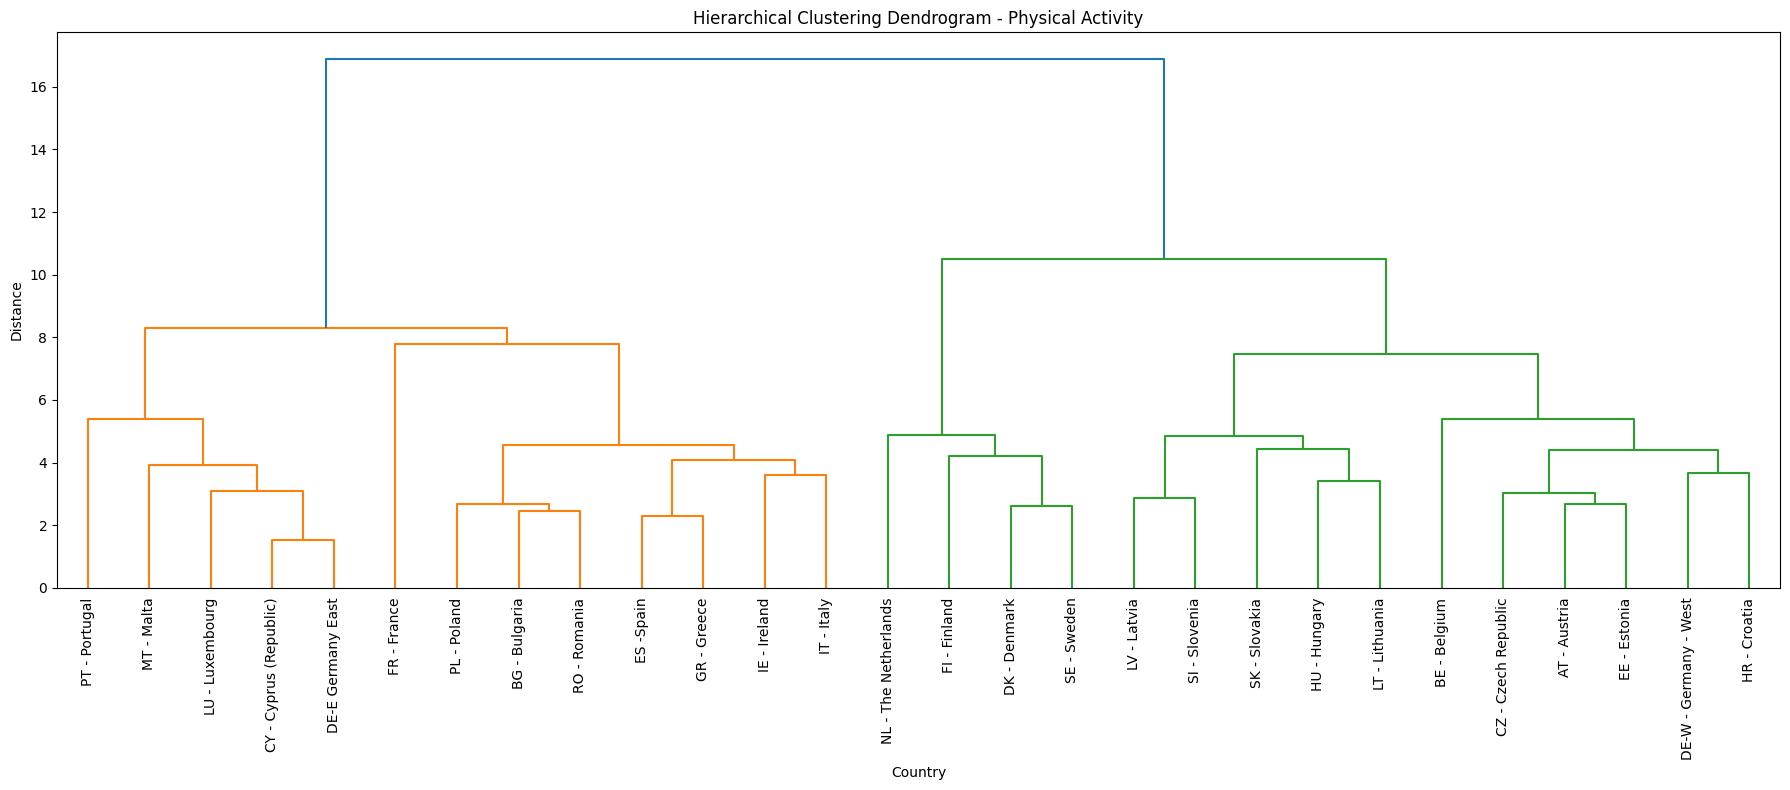

                   Country  Cluster
0             AT - Austria        0
1             BE - Belgium        0
2            BG - Bulgaria        3
3   CY - Cyprus (Republic)        1
4      CZ - Czech Republic        0
5        DE-E Germany East        1
6    DE-W - Germany - West        0
7             DK - Denmark        2
8             EE - Estonia        0
9                ES -Spain        3
10            FI - Finland        2
11             FR - France        4
12             GR - Greece        3
13            HR - Croatia        0
14            HU - Hungary        0
15            IE - Ireland        3
16              IT - Italy        3
17          LT - Lithuania        0
18         LU - Luxembourg        1
19             LV - Latvia        0
20              MT - Malta        1
21    NL - The Netherlands        2
22             PL - Poland        3
23           PT - Portugal        1
24            RO - Romania        3
25             SE - Sweden        2
26           SI - Slovenia  

In [52]:
#creating a dendrogram based on the physical activity and clustering the countries
df=main_physical
countries = df['country']
df = df.drop(columns=['country'])
df = pd.get_dummies(df, columns=['qb2'])

# Group data by countries and aggregate features
grouped_df = df.groupby(countries).sum()

# Set the index of the DataFrame to the 'Country' column
grouped_df.index.name = 'Country'  
grouped_df.reset_index(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
grouped_df_scaled = scaler.fit_transform(grouped_df.set_index('Country'))

# Perform hierarchical clustering
linkage_matrix = linkage(grouped_df_scaled, method='ward', metric='euclidean')
clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = clustering.fit_predict(grouped_df_scaled)

# Visualization: Dendrogram with adjusted settings
plt.figure(figsize=(18, 8)) 
dendrogram(linkage_matrix, labels=grouped_df['Country'].values, truncate_mode='lastp', p=30, leaf_font_size=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram - Physical Activity')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# Assign cluster labels to countries
clustered_countries = pd.DataFrame({'Country': grouped_df.Country, 'Cluster': cluster_labels})

print(clustered_countries)

In [57]:
optimal_clusters = 5

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(grouped_df_scaled)

# Get the centroids
centroids = kmeans.cluster_centers_
cluster_labels_ser=pd.Series(cluster_labels).replace({4:'Average organized countreis',0:'Average non-organized countreis',1:'Active non-organized countries',3:'Average multi-context countreis',2:'Very active countries'})
# Create a DataFrame with country names and cluster labels
clustered_countries_kmeans = pd.DataFrame({'Country': grouped_df['Country'], 'Cluster': cluster_labels_ser})

fig = go.Figure()

# Add scatter plots for each cluster
#for cluster in range(optimal_clusters):
for cluster in ['Average organized countreis','Average non-organized countreis','Active non-organized countries','Average multi-context countreis','Very active countries']:
    clustered_data = clustered_countries_kmeans[clustered_countries_kmeans['Cluster'] == cluster]
    fig.add_trace(go.Scatter(
        x=clustered_data['Country'],
        y=[cluster] * len(clustered_data),
        mode='markers',
        name=f'{cluster}',
        marker=dict(size=10, symbol='circle', opacity=0.7)
    ))

    
fig.update_layout(
    title='K-means++ Clustering of Countries',
    xaxis_title='Country',
    yaxis_title='Cluster',
    title_x=0.5,
    xaxis=dict(tickangle=90),
    yaxis={'showticklabels': False}
)

fig.show()


C:\Users\DONGARD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



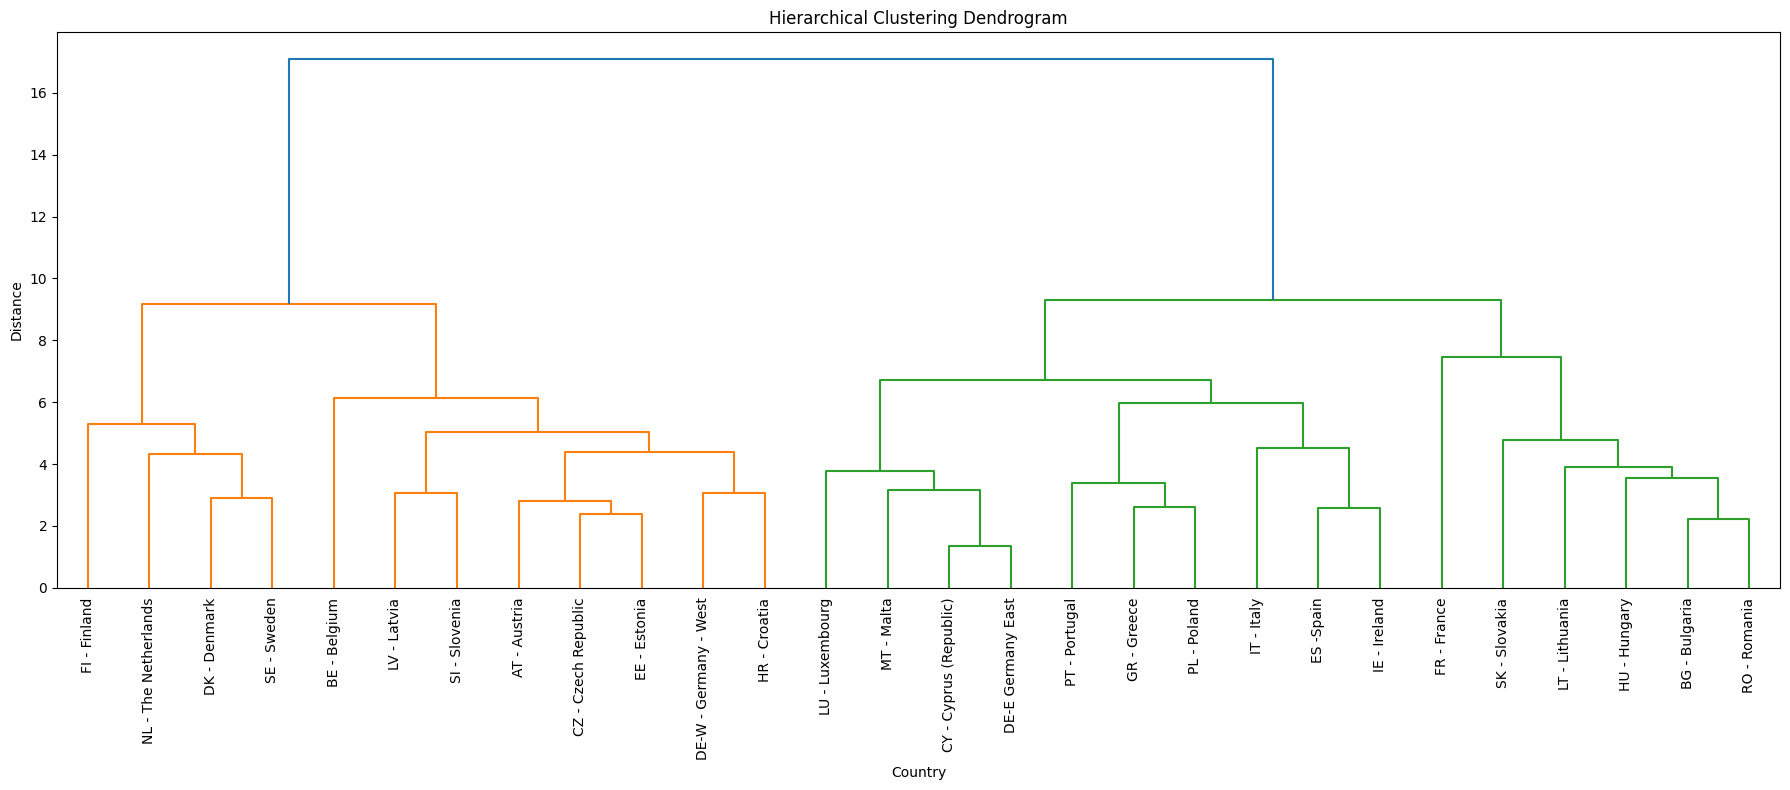

                   Country  Cluster
0             AT - Austria        1
1             BE - Belgium        1
2            BG - Bulgaria        2
3   CY - Cyprus (Republic)        0
4      CZ - Czech Republic        1
5        DE-E Germany East        0
6    DE-W - Germany - West        1
7             DK - Denmark        3
8             EE - Estonia        1
9                ES -Spain        0
10            FI - Finland        3
11             FR - France        4
12             GR - Greece        0
13            HR - Croatia        1
14            HU - Hungary        2
15            IE - Ireland        0
16              IT - Italy        0
17          LT - Lithuania        2
18         LU - Luxembourg        0
19             LV - Latvia        1
20              MT - Malta        0
21    NL - The Netherlands        3
22             PL - Poland        0
23           PT - Portugal        0
24            RO - Romania        2
25             SE - Sweden        3
26           SI - Slovenia  

In [79]:
#creating a dendrogram based on the sport activities and clustering the countries
df=main_sport
countries = df['country']
df = df.drop(columns=['country'])

df = pd.get_dummies(df, columns=['qb1'])

# Group data by countries and aggregate features
grouped_df = df.groupby(countries).sum()

# Set the index of the DataFrame to the 'Country' column
grouped_df.index.name = 'Country'  
grouped_df.reset_index(inplace=True)

# Standardize numerical features
scaler = StandardScaler()
grouped_df_scaled = scaler.fit_transform(grouped_df.set_index('Country'))

# Perform hierarchical clustering
linkage_matrix = linkage(grouped_df_scaled, method='ward', metric='euclidean')
clustering = AgglomerativeClustering(n_clusters=5 ,linkage='ward')
cluster_labels = clustering.fit_predict(grouped_df_scaled)

# Visualization: Dendrogram with adjusted settings
plt.figure(figsize=(18, 8)) 
dendrogram(linkage_matrix, labels=grouped_df['Country'].values, truncate_mode='lastp', p=30, leaf_font_size=10, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Country')
plt.ylabel('Distance')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

# Assign cluster labels to countries
clustered_countries = pd.DataFrame({'Country': grouped_df.Country, 'Cluster': cluster_labels})
print(clustered_countries)

In [59]:
optimal_clusters = 5

# Perform K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(grouped_df_scaled)
cluster_labels_ser=pd.Series(cluster_labels).replace({0:'Average organized countreis',1:'Average non-organized countreis',2:'Active non-organized countries',3:'Average multi-context countreis',4:'Very active countries'})
# Get the centroids
centroids = kmeans.cluster_centers_

# Create a DataFrame with country names and cluster labels
clustered_countries_kmeans = pd.DataFrame({'Country': grouped_df['Country'], 'Cluster': cluster_labels_ser})

fig = go.Figure()

# Add scatter plots for each cluster
#for cluster in range(optimal_clusters):
for cluster in ['Average organized countreis','Average non-organized countreis','Active non-organized countries','Average multi-context countreis','Very active countries']:
    clustered_data = clustered_countries_kmeans[clustered_countries_kmeans['Cluster'] == cluster]
    fig.add_trace(go.Scatter(
        x=clustered_data['Country'],
        y=[cluster] * len(clustered_data),
        mode='markers',
        name=f'{cluster}',
        marker=dict(size=10, symbol='circle', opacity=0.7)
    ))

    
fig.update_layout(
    title='K-means++ Clustering of Countries',
    xaxis_title='Country',
    yaxis_title='Cluster',
    title_x=0.5,
    xaxis=dict(tickangle=90),
    yaxis={'showticklabels': False}
)

fig.show()


C:\Users\DONGARD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

